In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

from gensim.models import KeyedVectors
from gensim.downloader import load

glove_model = load('glove-wiki-gigaword-50')
#fast_text_model = KeyedVectors.load_word2vec_format("data/wiki-news-300d-1M.vec", binary=False)

from sentence_transformers import SentenceTransformer, util

# Load model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Christian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')
df = df.drop(columns=['Director', 'Cast', 'Wiki Page'])
df.head(3)

,Release Year,Title,Origin/Ethnicity,Genre,Plot
0,1901,Kansas Saloon Smashers,American,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,unknown,"The film, just over a minute long, is composed..."


In [3]:
df_known = pd.read_excel('data/Known_Plots.xlsx')
df_known.head(3)

,Drama,Romance,Comedy
0,"In 1947, Portland, Maine, banker Andy Dufresne...",In 1981 a feather lands at a bus stop in Savan...,"A group of lazy, ignorant highschool students,..."
1,"In 1945, the don of New York City's Corleone f...","Part I In 1939, in Fascist Italy, young Italia...","At night in Paris, Driss is driving Philippe's..."
2,A gang of masked criminals rob a mafia-owned b...,"On Christmas Eve 1945, in Bedford Falls, New Y...",A Labrador puppy escapes from the house of a b...


In [4]:
comedic_plots = df_known['Comedy'].tolist()
dramatic_plots = df_known['Drama'].tolist()
romantic_plots = df_known['Romance'].tolist()

In [ ]:
def similarity_to_genres(plot):

    dramatic_plots_check = [plot] + dramatic_plots

    embeddings = bert_model.encode(dramatic_plots_check)
    similarities = bert_model.similarity(embeddings, embeddings)
    col0 = similarities[:, 0]
    sim1 = 1
    for i in range(1, len(col0)):
        sim1 += float(col0[i])

    romantic_plots_check = [plot] + romantic_plots

    embeddings = bert_model.encode(romantic_plots_check)
    similarities = bert_model.similarity(embeddings, embeddings)
    col0 = similarities[:, 0]
    sim2 = 1
    for i in range(1, len(col0)):
        sim2 += float(col0[i])


    return [sim1, sim2]


for i in range(1000, 1005):
    print(similarity_to_genres(df.iloc[i]['Plot']),  df.iloc[i]['Genre'])

[1.0, 1.0] drama
[1.0, 1.0] operetta
[1.0, 1.0] romance
[1.0, 1.0] western
[1.0, 1.0] adventure


In [6]:
n = 1000 
df_sample = df.head(n)

labels = df_sample['Genre'].values

In [7]:
X = np.zeros((n, 2))


for i, plot in enumerate(df_sample['Plot']):
    X[i] = similarity_to_genres(plot)

#print(X)

C:\Users\Christian\AppData\Local\Temp\ipykernel_47956\1967159267.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=mapped_colors, cmap='viridis')


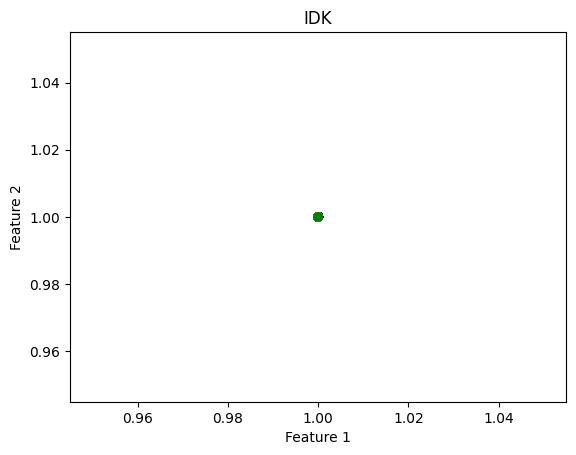

{'romance': 'red', 'comedy': 'blue', 'drama': 'green'}


In [8]:
import matplotlib.colors as mcolors

color_map = {
    'romance': 'red',
    'comedy': 'blue',
    'drama': 'green'
}

default_color = 'gray'

mapped_colors = [mcolors.to_hex(color_map.get(g, default_color)) for g in labels]

plt.scatter(X[:, 0], X[:, 1], c=mapped_colors, cmap='viridis')
plt.title("IDK")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

#plt.axis([0, 10, -10, 10])
plt.show()

print(color_map)

In [9]:
print(X)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


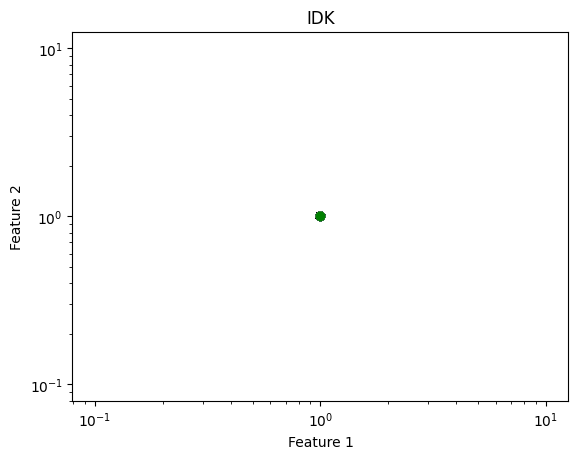

{'romance': 'red', 'comedy': 'blue', 'drama': 'green'}


In [10]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

color_map = {
    'romance': 'red',
    'comedy': 'blue',
    'drama': 'green'
}

default_color = 'gray'

mapped_colors = [mcolors.to_hex(color_map.get(g, default_color)) for g in labels]

plt.scatter(X[:, 0], X[:, 1], c=mapped_colors)
plt.title("IDK")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Make axes logarithmic
plt.xscale("log")
plt.yscale("log")

plt.show()

print(color_map)
